In [ ]:
import cv2 
 # colour analysis 
image = cv2.imread('img_31.jpg') 
B_channel, G_channel, R_channel = cv2.split(image) 
cv2.imshow("original", image) 
cv2.imshow("blue", B_channel)   
cv2.imshow("Green", G_channel)   
cv2.imshow("red", R_channel) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

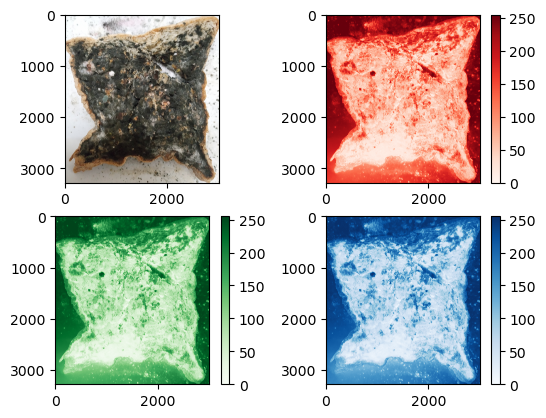

In [1]:
import cv2
import matplotlib.pyplot as plt
from cv2 import cvtColor, COLOR_BGR2RGB 
# Read
img = cv2.imread('img_31.jpg')

# Split
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# Plot
fig, axs = plt.subplots(2,2)

cax_00 = axs[0,0].imshow(cv2.cvtColor(img, COLOR_BGR2RGB))
cax_01 = axs[0,1].imshow(red, cmap='Reds')
fig.colorbar(cax_01, ax=axs[0,1])
cax_10 = axs[1,0].imshow(green, cmap='Greens')
fig.colorbar(cax_10, ax=axs[1,0])
cax_11 = axs[1,1].imshow(blue, cmap='Blues')
fig.colorbar(cax_11, ax=axs[1,1])

plt.show()

In [ ]:
import cv2
import numpy as np

def bgr_to_cmyk(image):
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Normalize the RGB values to 0-1 range
    image = image / 255.0
    
    # Convert RGB to CMY
    C = 1 - image[:, :, 0]
    M = 1 - image[:, :, 1]
    Y = 1 - image[:, :, 2]
    
    # Calculate K channel
    K = np.min([C, M, Y], axis=0)
    
    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        C = (C - K) / (1 - K)
        M = (M - K) / (1 - K)
        Y = (Y - K) / (1 - K)
    
    # Replace NaN with 0 for the case when K=1
    C[np.isnan(C)] = 0
    M[np.isnan(M)] = 0
    Y[np.isnan(Y)] = 0
    
    # Stack the channels together to form the CMYK image
    CMYK = np.dstack((C, M, Y, K))
    
    return CMYK

# Load an image in BGR color space
image = cv2.imread('img_31.jpg')

# Convert the image from BGR to CMYK
cmyk_image = bgr_to_cmyk(image)
print('Original Image\nDatatype:', image.dtype, '\nDimensions:', image.shape)
print('CMYK Image\nDatatype:', cmyk_image.dtype, '\nDimensions:', cmyk_image.shape)


cv2.imshow("Original Image", image)
cv2.imshow("CMYK Image", cmyk_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


Original Image
Datatype: uint8 
Dimensions: (3279, 3010, 3)
CMYK Image
Datatype: float64 
Dimensions: (3279, 3010, 4)


In [ ]:
import cv2 

#imread is use to read an image from a location
image = cv2.imread("img_31.jpg")

hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

cv2.imshow("Original Image", image)
cv2.imshow("HSV Image", hsv_image)
cv2.imwrite("img_31.jpg", hsv_image)

rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
cv2.imshow("RGB Image", rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
from cv2 import COLOR_RGB2GRAY 
# RGB to binary image
image = cv2.imread("img_31.jpg")

gray_image = cv2.cvtColor(image, COLOR_RGB2GRAY) 
(thresh, binary) = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

cv2.imshow("Original Image",image)
cv2.imshow("Gray Image",gray_image)
cv2.imshow("Black and White Image",binary)

cv2.waitKey(0)
cv2.destroyAllWindows()
